In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [44]:
data = pd.read_csv('eu_9am.csv')
data.head(6)
#data.dtypes

,Time,Cost
0,08-02-2017,0.0497
1,09-02-2017,0.0559
2,10-02-2017,0.0550
3,11-02-2017,0.0568
4,12-02-2017,0.0550
5,13-02-2017,0.0504


In [45]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('eu_9am.csv', parse_dates=['Time'], index_col='Time',date_parser=dateparse)
data.head(5)

,Cost
Time,
2017-02-08,0.0497
2017-02-09,0.0559
2017-02-10,0.0550
2017-02-11,0.0568
2017-02-12,0.0550


In [46]:
data.index

DatetimeIndex(['2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19',
               '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23',
               '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-04', '2017-03-05', '2017-03-06', '2017-03-07',
               '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-11',
               '2017-03-12', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-25', '2017-03-26', '2017-03-27',
               '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31',
               '2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
      

In [47]:
ts = data['Cost']
ts.head(10)

Time
2017-02-08    0.0497
2017-02-09    0.0559
2017-02-10    0.0550
2017-02-11    0.0568
2017-02-12    0.0550
2017-02-13    0.0504
2017-02-14    0.0676
2017-02-15    0.0471
2017-02-16    0.0489
2017-02-17    0.0490
Name: Cost, dtype: float64

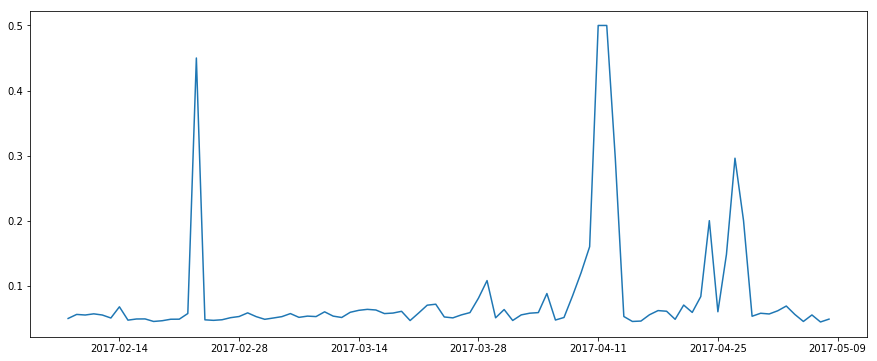

In [48]:
plt.plot(ts)

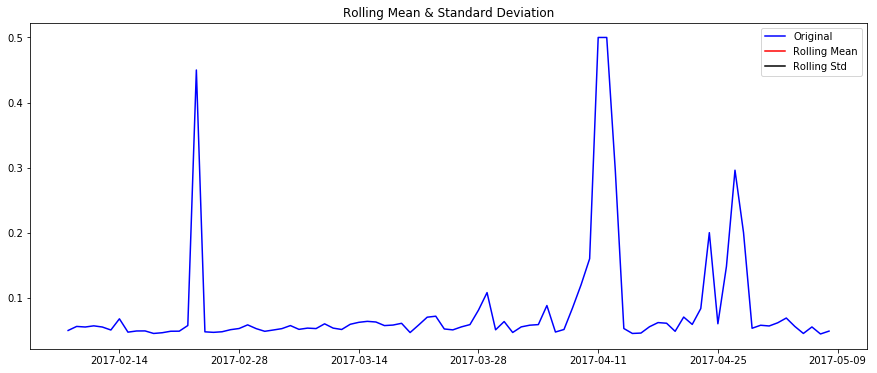

Test Statistic                 -5.206841
p-value                         0.000009
#Lags Used                      0.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64

In [49]:
from statsmodels.tsa.stattools import adfuller
    
    #Determing rolling statistics
#rolmean = pd.rolling_mean(ts, window=12)
#rolstd = pd.rolling_std(ts, window=12)

rolmean = ts.rolling(365).mean()
rolstd = ts.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

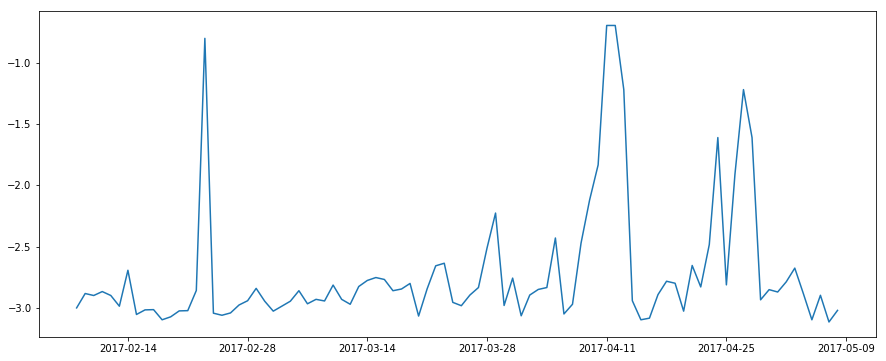

In [50]:
ts_log = np.log(ts)
plt.plot(ts_log)

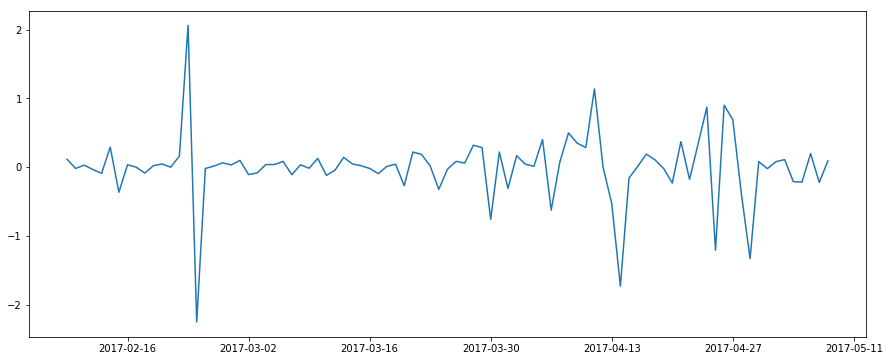

In [51]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

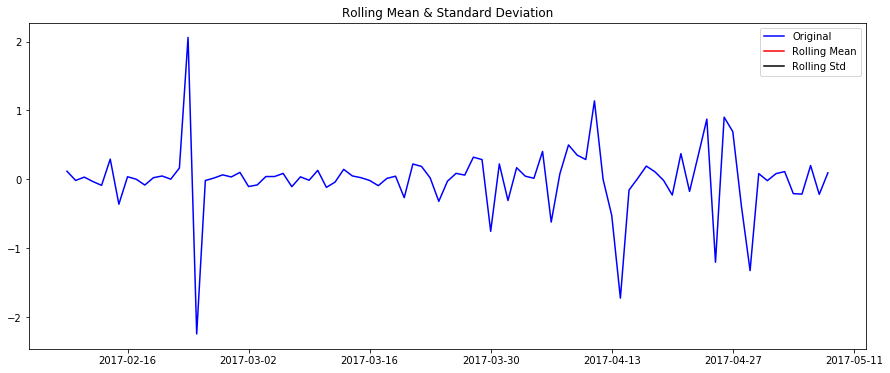

Test Statistic                -1.143207e+01
p-value                        6.480323e-21
#Lags Used                     0.000000e+00
Number of Observations Used    8.800000e+01
Critical Value (1%)           -3.506944e+00
Critical Value (5%)           -2.894990e+00
Critical Value (10%)          -2.584615e+00
dtype: float64

In [52]:
ts_log_diff.dropna(inplace=True)
rolmean = ts_log_diff.rolling(365).mean()
rolstd = ts_log_diff.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

In [53]:
from statsmodels.tsa.stattools import acf, pacf

In [54]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

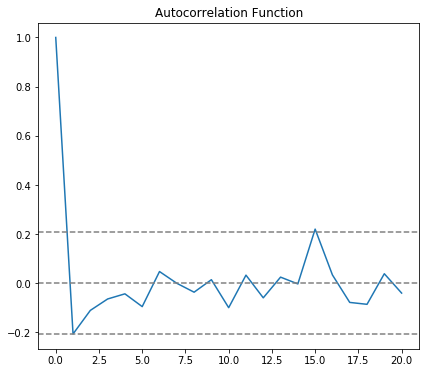

In [55]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

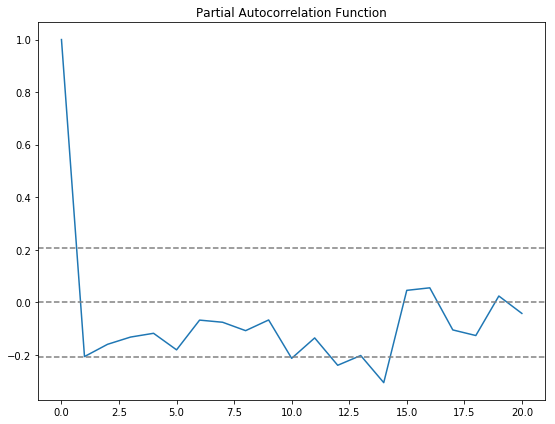

In [56]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [57]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 21.5583')

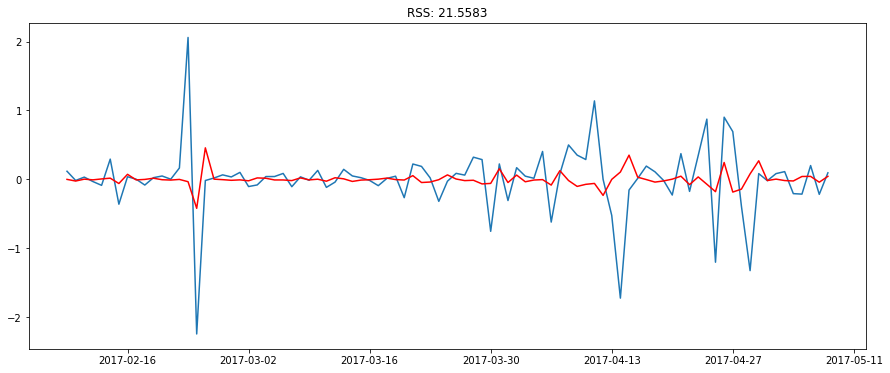

In [58]:
#AR model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 21.0666')

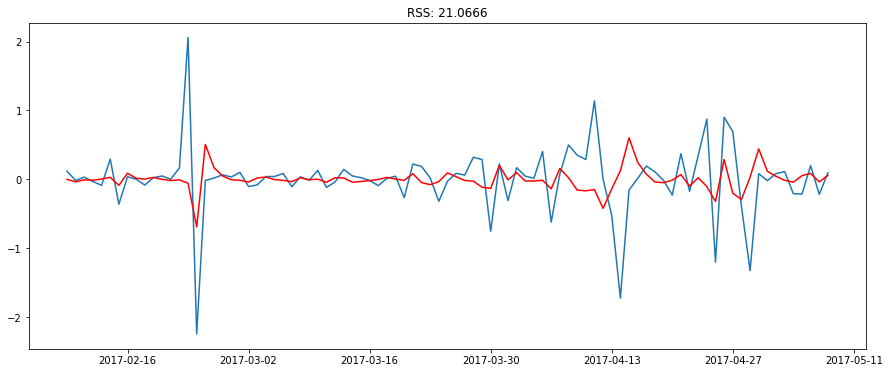

In [59]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 17.6852')

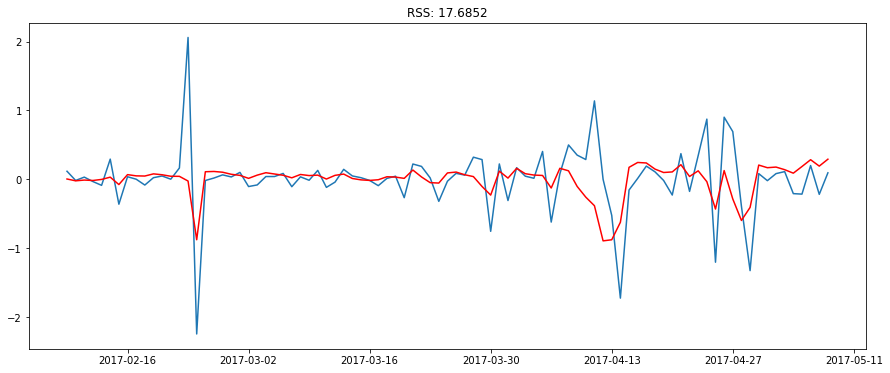

In [60]:
#combined model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [61]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head(5)



Time
2017-02-09    0.004918
2017-02-10   -0.021576
2017-02-11   -0.010609
2017-02-12   -0.016596
2017-02-13   -0.001286
dtype: float64

In [62]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head(5)

Time
2017-02-09    0.004918
2017-02-10   -0.016658
2017-02-11   -0.027267
2017-02-12   -0.043863
2017-02-13   -0.045148
dtype: float64

In [63]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(5)

C:\Users\Piyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Time
2017-02-08   -3.001750
2017-02-09   -2.996832
2017-02-10   -3.018408
2017-02-11   -3.029017
2017-02-12   -3.045613
dtype: float64

Text(0.5,1,'RMSE: 0.1000')

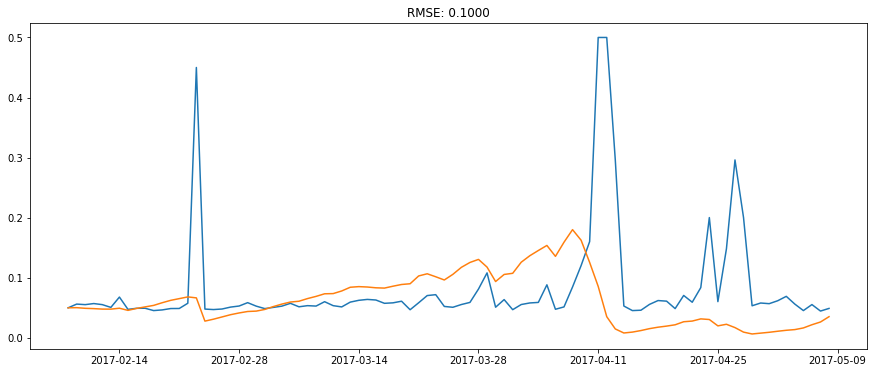

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [65]:
predictions_ARIMA.head

<bound method NDFrame.head of Time
2017-02-08    0.049700
2017-02-09    0.049945
2017-02-10    0.048879
2017-02-11    0.048363
2017-02-12    0.047567
2017-02-13    0.047506
2017-02-14    0.049035
2017-02-15    0.045455
2017-02-16    0.048685
2017-02-17    0.051208
2017-02-18    0.053722
2017-02-19    0.058160
2017-02-20    0.062158
2017-02-21    0.065004
2017-02-22    0.067893
2017-02-23    0.066240
2017-02-24    0.027542
2017-02-25    0.030757
2017-02-26    0.034485
2017-02-27    0.038236
2017-02-28    0.041144
2017-03-01    0.043584
2017-03-02    0.044208
2017-03-03    0.046994
2017-03-04    0.051741
2017-03-05    0.055909
2017-03-06    0.059323
2017-03-07    0.060653
2017-03-08    0.065083
2017-03-09    0.068739
                ...   
2017-04-09    0.162320
2017-04-10    0.125294
2017-04-11    0.085392
2017-04-12    0.034935
2017-04-13    0.014520
2017-04-14    0.007781
2017-04-15    0.009262
2017-04-16    0.011834
2017-04-17    0.015011
2017-04-18    0.017422
2017-04-19    0.019240